<a href="https://colab.research.google.com/github/akshitasingh0706/DriftDetection/blob/main/DDClass_SampleEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/Corona_NLP2.zip

Archive:  gdrive/My Drive/Corona_NLP2.zip
  inflating: Covid-19 Twitter Dataset (Apr-Jun 2020).csv  
  inflating: Covid-19 Twitter Dataset (Aug-Sep 2020).csv  


In [3]:
import pandas as pd
import numpy as np

In [4]:
features = ['created_at', 'original_text', 'sentiment']
data1 = pd.read_csv("Covid-19 Twitter Dataset (Apr-Jun 2020).csv", encoding = 'ISO-8859-1')[features]
data2 = pd.read_csv("Covid-19 Twitter Dataset (Aug-Sep 2020).csv", encoding = 'ISO-8859-1')[features]

data1 = data1[data1['sentiment'] != 'neu']
data2 = data2[data2['sentiment'] != 'neu']

data1['sentiment'] = data1['sentiment'].replace('pos', 1)
data1['sentiment'] = data1['sentiment'].replace('neg', 0)


data2['sentiment'] = data2['sentiment'].replace('pos', 1)
data2['sentiment'] = data2['sentiment'].replace('neg', 0)

data1 = np.array(data1)
np.random.shuffle(data1)
X1 = np.array([i[1] for i in data1])

data2 = np.array(data2)
np.random.shuffle(data1)
X2 = np.array([i[1] for i in data2])

print("X1 length:", len(X1))
print("X2 length:", len(X2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


X1 length: 147892
X2 length: 191581


In [5]:
!pip install -r /content/gdrive/MyDrive/DFCI/TestingPackage/DriftDetection/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 22.2 MB/s 
     |████████████████████████████████| 246 kB 72.1 MB/s 
     |████████████████████████████████| 85 kB 5.5 MB/s 
     |████████████████████████████████| 212 kB 72.8 MB/s 
     |████████████████████████████████| 4.8 MB 68.2 MB/s 
     |████████████████████████████████| 4.4 MB 68.5 MB/s 
     |████████████████████████████████| 596 kB 68.7 MB/s 
     |████████████████████████████████| 6.6 MB 63.4 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ab0aab77af42d37c363294994454eb7e478aaf6a57b1cd8e7f0d673cd7771620
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transfo

In [6]:
import sys
sys.path.insert(0,'/content/gdrive/My Drive/DFCI/TestingPackage/DriftDetection') # very important

In [7]:
from fileImports import imports 
samplingData, baseModels, embedding, distributions, detectors, AlibiDetectors = imports.run()

# Doc2Vec

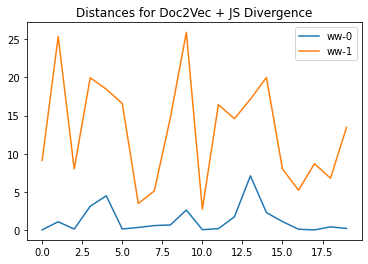

In [8]:
drift_type = "Sudden"
model_name = None
embedding_model = "Doc2Vec" 
sample_size = 500
test = "JS"

flt = detectors(data_ref = X1, data_h0 = X1, data_h1 = X2, test = test, drift_type = drift_type,
                sample_size = sample_size, embedding_model = embedding_model, model_name = model_name)
result = flt.detector()

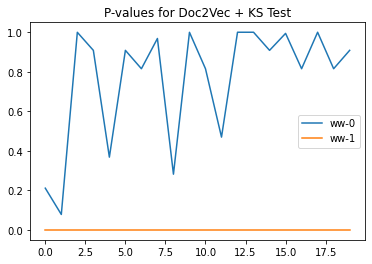

In [9]:
test = "KS"

flt = detectors(data_ref = X1, data_h0 = X1, data_h1 = X2, test = test, drift_type = drift_type,
                sample_size = sample_size, embedding_model = embedding_model, model_name = model_name)
result = flt.detector()

# SBERT

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFor

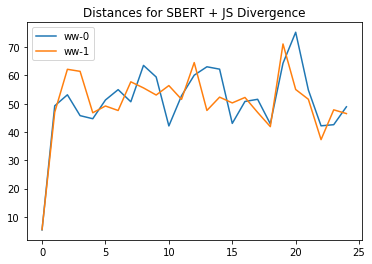

In [11]:
drift_type = "Sudden"
model_name = 'bert-base-uncased'
embedding_model = "SBERT" 
sample_size = 500
test = "JS"
transformation = "PCA"
iters = 1

flt = detectors(data_ref = X1, data_h0 = X1, data_h1 = X2, test = test, drift_type = drift_type,
                sample_size = sample_size, embedding_model = embedding_model, model_name = model_name,
                transformation = transformation, iters = iters)
result = flt.detector()

In [12]:
test = "KS"

flt = detectors(data_ref = X1, data_h0 = X1, data_h1 = X2, test = test, drift_type = drift_type,
                sample_size = sample_size, embedding_model = embedding_model, model_name = model_name,
                transformation = transformation, iters = iters)
result = flt.detector()

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFor

# AlibiDetectors

In [13]:
test = "MMDDrift"
sample_size = 200
windows = None
model_name = 'bert-base-uncased'


#alibi paramters
emb_type = 'hidden_state'
n_layers = 8
max_len = 100
enc_dim = 32 # for uae
tokenizer_size = 3
batch_size = 32

ab = AlibiDetectors(data_ref = X1, data_h0 = X2, data_h1 = X2,
                    test = test, sample_size = sample_size, windows = None,
                    drift_type = drift_type,  model_name = model_name,
                    
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

ab.predict()

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for  X_h0 data using  MMDDrift test:
Drift? No!
p-value: 0.05
Drift results for  X_comp data using  MMDDrift test:
Drift? No!
p-value: 0.45


In [14]:
test = "LSDDDrift"

ab = AlibiDetectors(data_ref = X1, data_h0 = X2, data_h1 = X2,
                    test = test, sample_size = sample_size, windows = None,
                    drift_type = drift_type,  model_name = model_name,
                    
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

ab.predict()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

Drift results for  X_h0 data using  LSDDDrift test:
Drift? No!
p-value: 0.07000000029802322
Drift results for  X_comp data using  LSDDDrift test:
Drift? No!
p-value: 0.18000000715255737


# Archive

In [ ]:
sampling = samplingData(data_ref = X1, data_h0 = X1, data_h1 = X2, 
                sample_size = 300, windows = None, drift_type = "Sudden")
sample_dict = sampling.samples()

In [ ]:
embs = embedding(data_ref = X1, data_h0 = X1, data_h1 = X2, test = "KL", 
                sample_size = 300, windows = None, drift_type = "Sudden", embedding_model = "Doc2Vec",
                model_name = model_name, transformation = None, emb_iters = 5)
final_dict = embs.final_embeddings()

In [ ]:
dis = distributions(data_ref = X1, data_h0 = X1, data_h1 = X2, transformation = None, windows = None, test = "KL",
                      drift_type = "Sudden", sample_size = 600, embedding_model = "Doc2Vec", iterations = 10)
final_dict = dis.final_distributions()